# Blending and Pasting Images

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# First Image
img1 = cv2.imread("../imgs/dog_backpack.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# Second Image
img2 = cv2.imread("../imgs/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

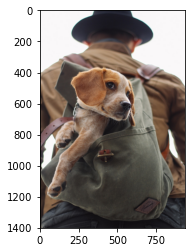

In [3]:
# Show First Image
plt.imshow(img1)

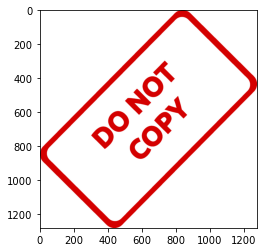

In [4]:
# Show Second Image
plt.imshow(img2)

In [5]:
img1.shape

(1401, 934, 3)

In [6]:
img2.shape

(1280, 1277, 3)

In [7]:
# Resizing Images
img1 = cv2.resize(img1, (1200,1200))
img2 = cv2.resize(img2, (1200,1200))

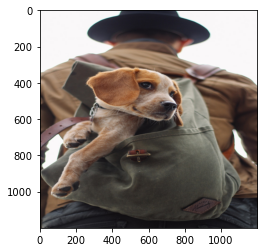

In [8]:
plt.imshow(img1)

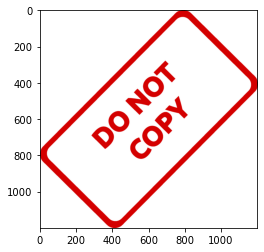

In [9]:
plt.imshow(img2)

In [10]:
# Blended images of the same size
blended = cv2.addWeighted(src1=img1, alpha=0.5, src2=img2, beta=0.5, gamma=0)

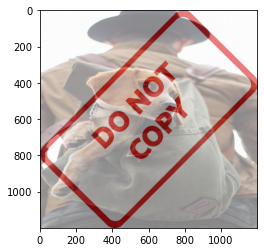

In [11]:
plt.imshow(blended)

In [12]:
blended = cv2.addWeighted(src1=img1, alpha=0.8, src2=img2, beta=0.2, gamma=0)

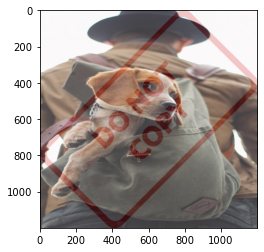

In [13]:
plt.imshow(blended)

In [14]:
# OVERLAY SMALL IMAGE ON TOP OF A LARGER IMAGE (NO BLENDING)
# Numpy reassignment
# First Image
img1 = cv2.imread("../imgs/dog_backpack.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# Second Image
img2 = cv2.imread("../imgs/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

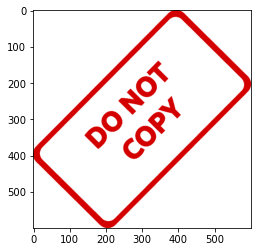

In [15]:
img2 = cv2.resize(img2, (600,600))
plt.imshow(img2)

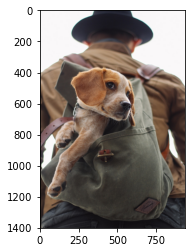

In [16]:
plt.imshow(img1)

In [17]:
large_img = img1.copy()
small_img = img2.copy()

In [18]:
x_offset = 0
y_offset = 0

In [19]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [20]:
large_img[y_offset:y_end, x_offset:x_end] = small_img

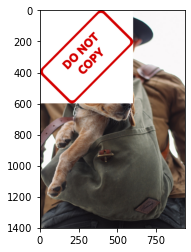

In [21]:
plt.imshow(large_img)

In [22]:
# BLEND TOGETHER IMAGES OF DIFFERENT SIZES
# First Image
img1 = cv2.imread("../imgs/dog_backpack.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# Second Image
img2 = cv2.imread("../imgs/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [23]:
img2 = cv2.resize(img2, (600,600))

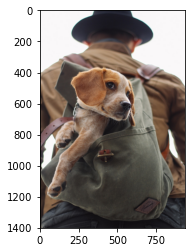

In [24]:
plt.imshow(img1)

In [25]:
img1.shape

(1401, 934, 3)

In [26]:
x_offset = img1.shape[1] - 600
y_offset = img1.shape[0] - 600

In [27]:
img2.shape

(600, 600, 3)

In [28]:
rows, cols, channels = img2.shape

In [29]:
roi = img1[y_offset:img1.shape[0], x_offset:img1.shape[1]]

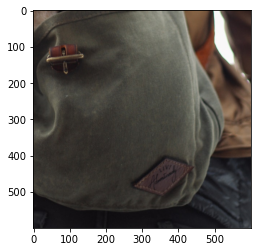

In [30]:
plt.imshow(roi)

In [31]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

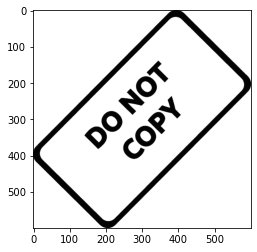

In [33]:
plt.imshow(img2gray, cmap="gray")

In [56]:
img2gray.shape

(600, 600)

In [34]:
mask_inv = cv2.bitwise_not(img2gray)

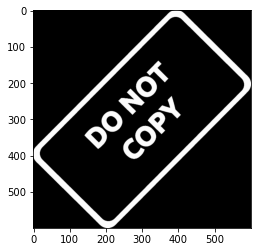

In [35]:
plt.imshow(mask_inv, cmap="gray")

In [36]:
mask_inv.shape

(600, 600)

In [39]:
img2.shape

(600, 600, 3)

In [49]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

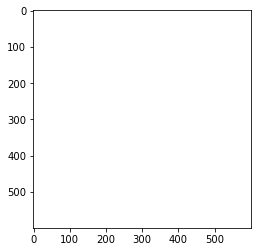

In [50]:
plt.imshow(white_background)

In [51]:
white_background.shape

(600, 600, 3)

In [52]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

In [54]:
bk.shape

(600, 600, 3)

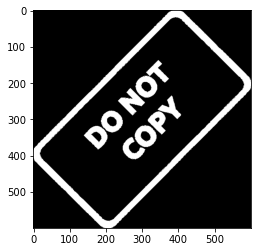

In [55]:
plt.imshow(bk)

In [57]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

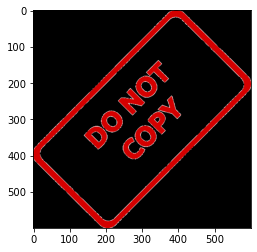

In [58]:
plt.imshow(fg)

In [59]:
final_roi = cv2.bitwise_or(roi, fg)

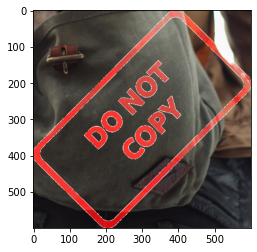

In [60]:
plt.imshow(final_roi)

In [61]:
large_img = img1
small_img = final_roi

In [62]:
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

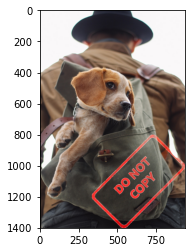

In [63]:
plt.imshow(large_img)

# Well Done!